# Visualizing CHESS temperature dependent data

## Import functions

In [1]:
import matplotlib.pyplot as plt
from nxs_analysis_tools import TempDependence

## The `TempDependence` class

It is assumed that the file structure of the temperature dependent scan is as follows:
 ```
folder
└── subfolder
    ├── 15
    ├── 100
    └── 300
``` 
Here we create a `TempDependence` objecct called `sample` whose temperature folders are found in the path `'example_data/sample_name'`.

In [2]:
sample = TempDependence()

## Loading data

Use the `load_datasets()` method to load the ".nxs" files. By default, all files ending with "hkli.nxs" are imported, but this can be changed using the `file_ending` parameter.

In [3]:
sample.load_datasets(folder='example_data/sample_name', file_ending="hkli.nxs")

Found temperature folders:
[0] 15
[1] 100
[2] 300
-----------------------------------------------
Loading 15 K indexed .nxs files...
Found example_data\sample_name\15\example_hkli.nxs
data:NXdata
  @axes = ['H', 'K', 'L']
  @signal = 'counts'
  H = float64(100)
  K = float64(150)
  L = float64(200)
  counts = float64(100x150x200)
-----------------------------------------------
Loading 100 K indexed .nxs files...
Found example_data\sample_name\100\example_hkli.nxs
data:NXdata
  @axes = ['H', 'K', 'L']
  @signal = 'counts'
  H = float64(100)
  K = float64(150)
  L = float64(200)
  counts = float64(100x150x200)
-----------------------------------------------
Loading 300 K indexed .nxs files...
Found example_data\sample_name\300\example_hkli.nxs
data:NXdata
  @axes = ['H', 'K', 'L']
  @signal = 'counts'
  H = float64(100)
  K = float64(150)
  L = float64(200)
  counts = float64(100x150x200)


A subset of temperatures can be imported using the `temperatures_list` parameter. Temperatures can be listed here as numeric values (`[15,300]`) or as strings (`['15','300']`).

In [4]:
sample.load_datasets(folder='example_data/sample_name', temperatures_list=[15,300])

Found temperature folders:
[0] 15
[1] 100
[2] 300
-----------------------------------------------
Loading 15 K indexed .nxs files...
Found example_data\sample_name\15\example_hkli.nxs
data:NXdata
  @axes = ['H', 'K', 'L']
  @signal = 'counts'
  H = float64(100)
  K = float64(150)
  L = float64(200)
  counts = float64(100x150x200)
-----------------------------------------------
Loading 300 K indexed .nxs files...
Found example_data\sample_name\300\example_hkli.nxs
data:NXdata
  @axes = ['H', 'K', 'L']
  @signal = 'counts'
  H = float64(100)
  K = float64(150)
  L = float64(200)
  counts = float64(100x150x200)


## Accessing the data

In [5]:
sample.load_datasets(folder='example_data/sample_name')

Found temperature folders:
[0] 15
[1] 100
[2] 300
-----------------------------------------------
Loading 15 K indexed .nxs files...
Found example_data\sample_name\15\example_hkli.nxs
data:NXdata
  @axes = ['H', 'K', 'L']
  @signal = 'counts'
  H = float64(100)
  K = float64(150)
  L = float64(200)
  counts = float64(100x150x200)
-----------------------------------------------
Loading 100 K indexed .nxs files...
Found example_data\sample_name\100\example_hkli.nxs
data:NXdata
  @axes = ['H', 'K', 'L']
  @signal = 'counts'
  H = float64(100)
  K = float64(150)
  L = float64(200)
  counts = float64(100x150x200)
-----------------------------------------------
Loading 300 K indexed .nxs files...
Found example_data\sample_name\300\example_hkli.nxs
data:NXdata
  @axes = ['H', 'K', 'L']
  @signal = 'counts'
  H = float64(100)
  K = float64(150)
  L = float64(200)
  counts = float64(100x150x200)


The datasets are stored under the `.datasets` attribute of the `TempDependence` object.

In [6]:
sample.datasets

{'15': NXdata('data'), '100': NXdata('data'), '300': NXdata('data')}

Use square brackets to index the individual datasets in the `NXentry`. Each dataset is a `NXdata` object and possesses the corresponding attributes and methods.

In [7]:
sample.datasets['15']

NXdata('data')

A list of temperatures is stored in the `.temperatures` attribute of the `TempDependence` object.

In [9]:
sample.temperatures

['15', '100', '300']

## Visualizing the data

For example, each `NXdata` object has a `.plot()` method. Here we plot the L=0.0 plane.

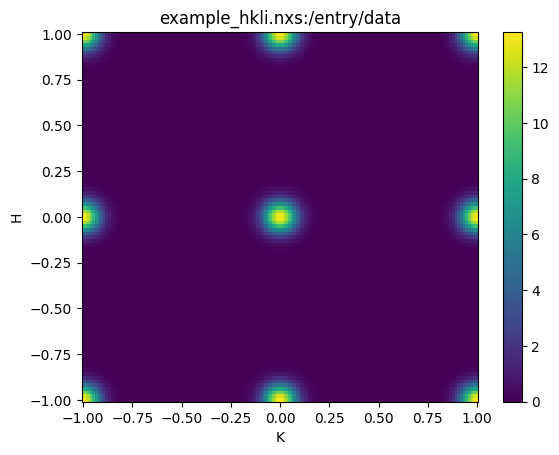

In [8]:
sample.datasets['15'][:,:,0.0].plot()

## Temperature dependent linecuts

Linecuts are performed using the `Scissors` class. An instance of the `Scissors` class is created for each temperature and stored in a dict attribute called `scissors`.

See documentation on the `Scissors` class for more information.

In [10]:
sample.scissors

{'15': <nxs_analysis_tools.datareduction.Scissors at 0x25d9707be10>,
 '100': <nxs_analysis_tools.datareduction.Scissors at 0x25d973fbd90>,
 '300': <nxs_analysis_tools.datareduction.Scissors at 0x25d973f9c50>}

The individual `Scissors` objects can be indexed using square brackets and the temperature.

In [11]:
sample.scissors['15']

Batch linecuts are peformed using a method of the `TempDependence` class called `.cut_data()`, which internally calls the `.cut_data()` method on each of the `Scissors` objects at each temperature.

In [12]:
sample.cut_data(center=(0,0,0), window=(0.1,1,0.1))

-------------------------------
Cutting T = 15 K data...
Linecut axis: K
Integrated axes: ['H', 'L']
-------------------------------
Cutting T = 100 K data...
Linecut axis: K
Integrated axes: ['H', 'L']
-------------------------------
Cutting T = 300 K data...
Linecut axis: K
Integrated axes: ['H', 'L']


{'15': NXdata('data'), '100': NXdata('data'), '300': NXdata('data')}

Similarly, batch plotting of the linecuts can be achieved using the `.plot_linecuts()` method of the `TempDependence` object, which internally calls the `.plot_linecut()` method of the `Scissors` objects at each temperature.

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='0 K 0', ylabel='counts'>)

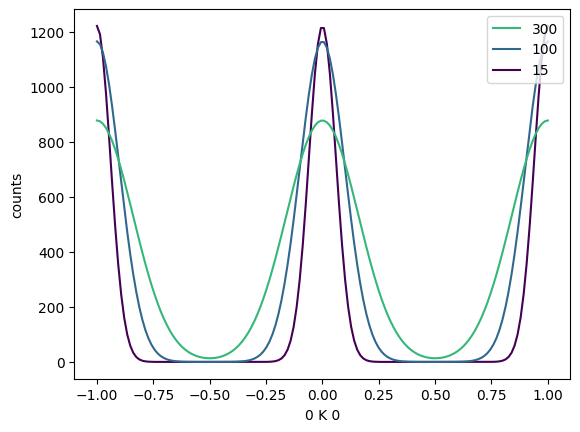

In [13]:
sample.plot_linecuts()

Any keyword arguments are passed to a `matplotlib` function `ax.plot()` within `.plot_linecuts()`, so the usual `matplotlib` parameters can be used to change the formatting.

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='0 K 0', ylabel='counts'>)

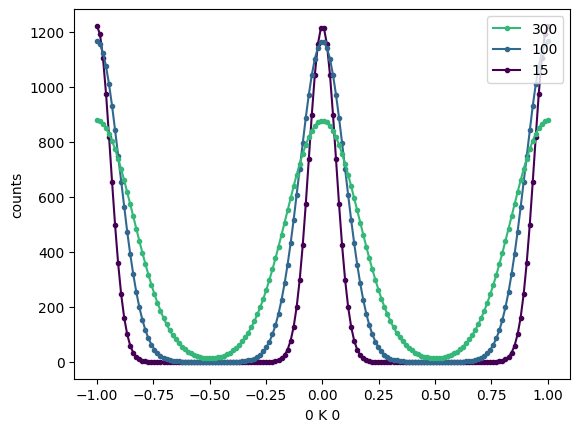

In [18]:
sample.plot_linecuts(linestyle='-', marker='.')

You can also introduce a vertical offset using the `vertical_offset` parameter.

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='0 K 0', ylabel='counts'>)

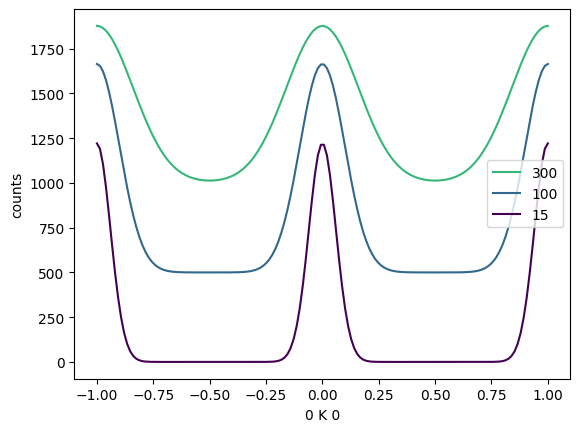

In [15]:
sample.plot_linecuts(vertical_offset=500)

## Visualizing the integration window

To visualize where the integration was performed, use the `.highlight_integration_window()` method of the `Scissors` class.

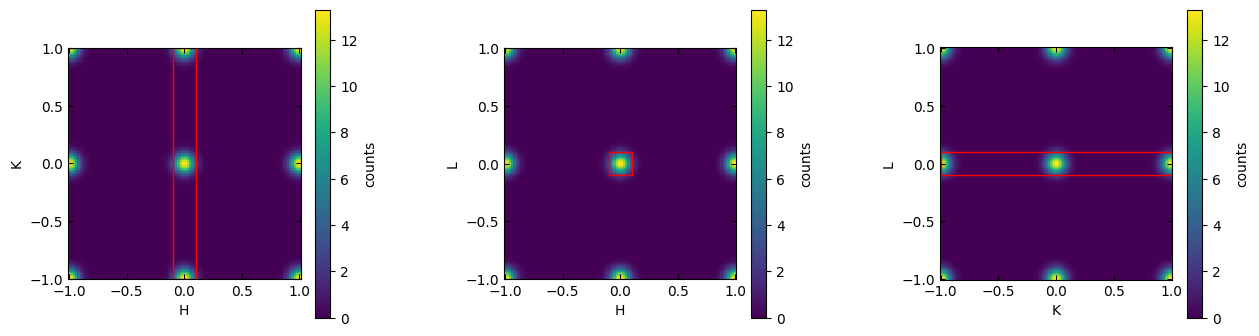

(<matplotlib.collections.QuadMesh at 0x25d9a93fad0>,
 <matplotlib.collections.QuadMesh at 0x25d9a98de50>)

In [16]:
sample.scissors['15'].highlight_integration_window()

Similarly, to plot a heatmap of the integrated volume itself, use the `.plot_integration_window()` method of the `Scissors` class.

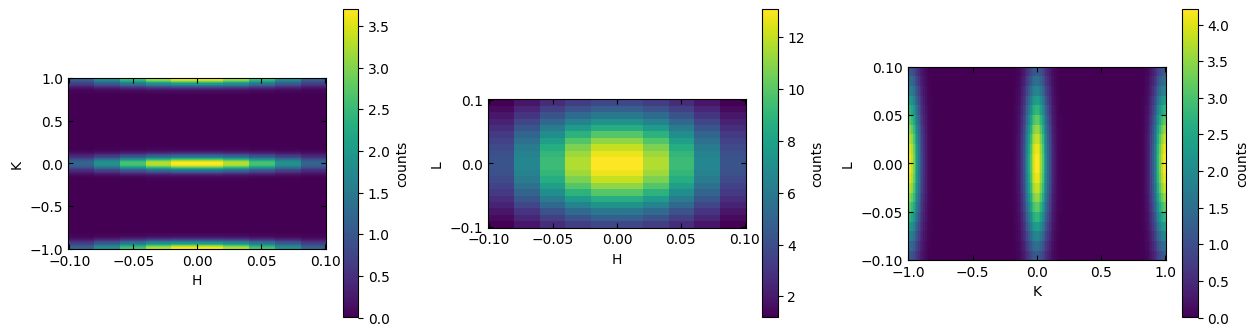

(<matplotlib.collections.QuadMesh at 0x25d985deb50>,
 <matplotlib.collections.QuadMesh at 0x25d974363d0>)

In [17]:
sample.scissors['15'].plot_integration_window()